In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import seaborn as sns
pd.options.display.float_format = '{:.5f}'.format
import warnings
import math
import scipy.stats as stats
import scipy
from sklearn.preprocessing import scale
warnings.filterwarnings('ignore')

In [51]:
df = pd.read_csv('us_bank_wages/us_bank_wages.txt', sep="\t")

<AxesSubplot:>

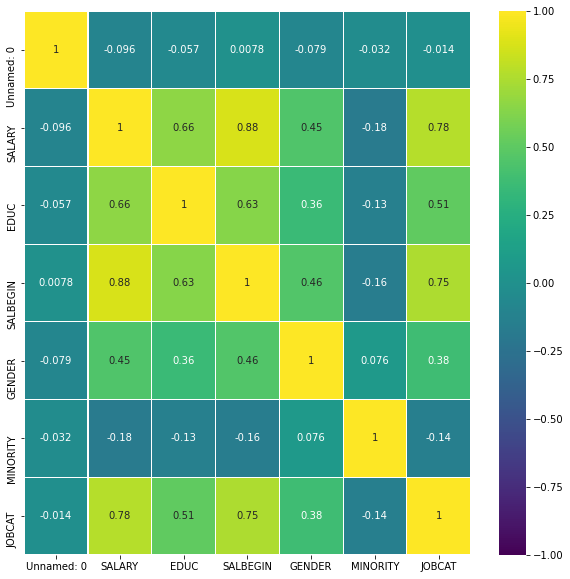

In [52]:
df_kor = df.corr()
plt.figure(figsize=(10,10)) 
sns.heatmap(df_kor, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)

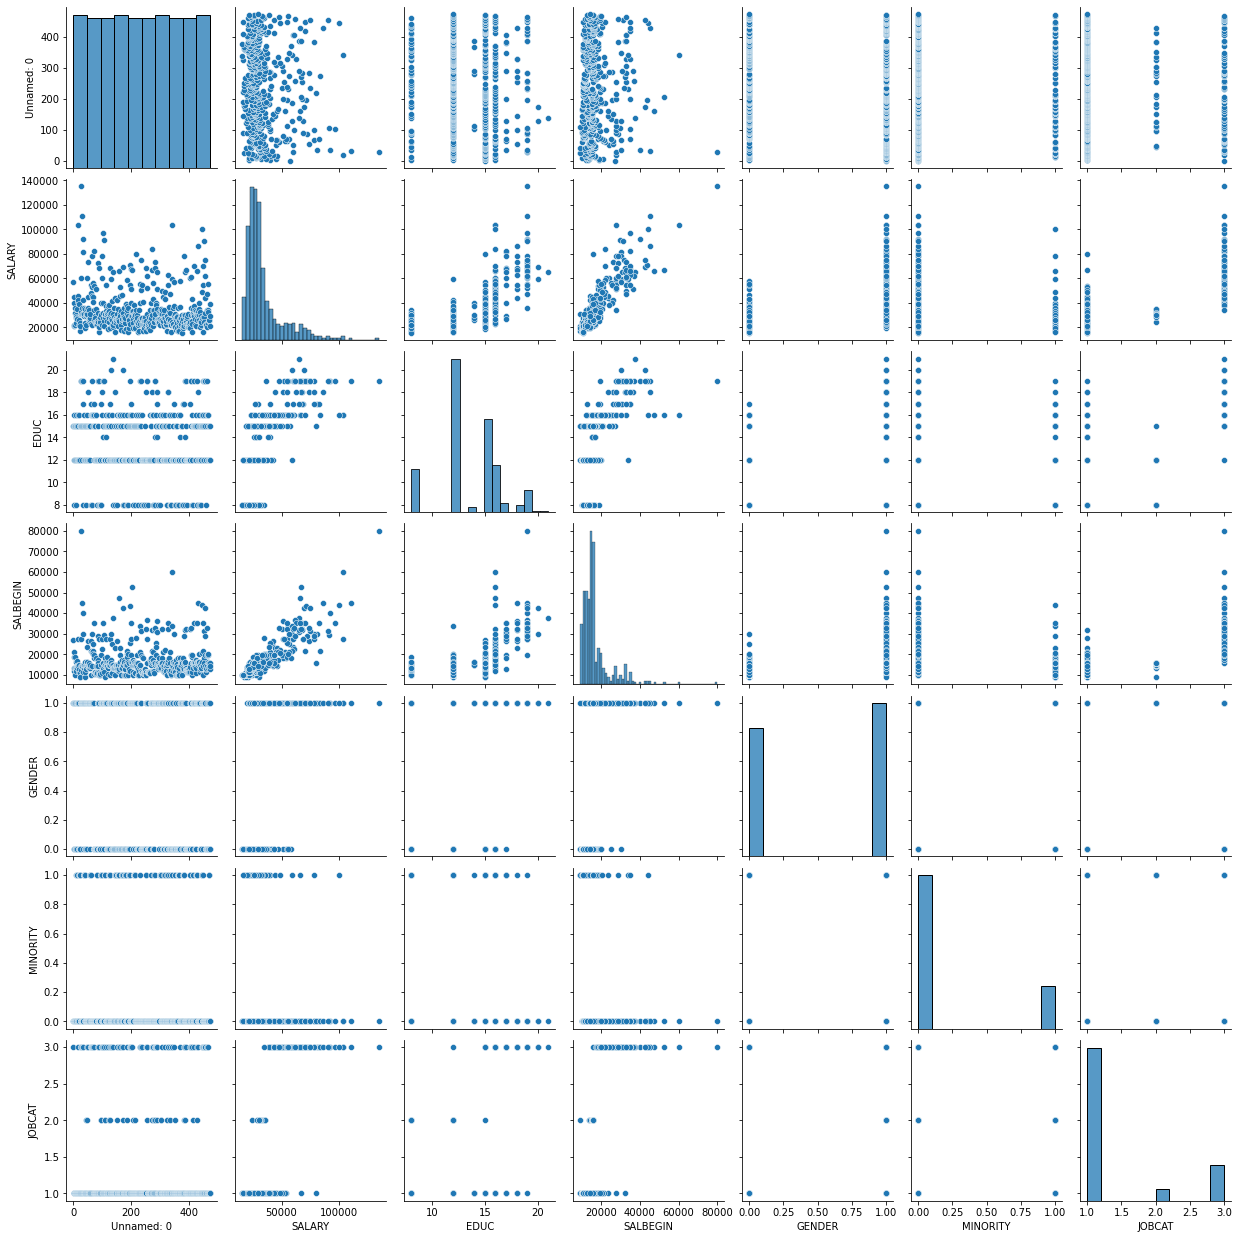

In [53]:
sns.pairplot(df)

In [54]:
y = df['SALARY']
X = df[['EDUC', 'SALBEGIN', 'GENDER', 'MINORITY', 'JOBCAT']]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
print('Training Data Count: {}'.format(X_train.shape[0]))
print('Testing Data Count: {}'.format(X_test.shape[0]))

Training Data Count: 379
Testing Data Count: 95


In [57]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 SALARY   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     356.4
Date:                Wed, 17 Feb 2021   Prob (F-statistic):          1.24e-139
Time:                        13:06:11   Log-Likelihood:                -3916.2
No. Observations:                 379   AIC:                             7844.
Df Residuals:                     373   BIC:                             7868.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7152.3046   1927.038     -3.712      0.000   -1.09e+04   -3363.084
EDUC         827.6211    174.628      4.739      0.000     484.243    1171.000
SALBEGIN       1.2782      0.083     15.431      0.000       1.115       1.441
GENDER      1293.9213    899.269      1.439      0.151    -474.350    3062.193
MINORITY   -1221.6694    968.808     -1.261      0.208   -3126.679     683.340
JOBCAT      5767.8372    749.605      7.694      0.000    4293.855    7241.819
==============================================================================
Omnibus:                      175.007   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1437.124
Skew:                           1.755   Prob(JB):                         0.00
Kurtosis:                      11.871   Cond. No.                     9.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
X_test = sm.add_constant(X_test)
y_preds = results.predict(X_test)
print("Root Mean Squared Error (RMSE) : {}".format(rmse(y_test, y_preds)))

Root Mean Squared Error (RMSE) : 6122.221681045234


gender and minority should be dropped because of high p-value, statistically insignificant

In [59]:
X2 = df[['EDUC', 'SALBEGIN', 'JOBCAT']]

In [60]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

In [61]:
print('Training Data Count: {}'.format(X2_train.shape[0]))
print('Testing Data Count: {}'.format(X2_test.shape[0]))

Training Data Count: 379
Testing Data Count: 95


In [62]:
X2_train = sm.add_constant(X2_train)
results2 = sm.OLS(y2_train, X2_train).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 SALARY   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     591.2
Date:                Wed, 17 Feb 2021   Prob (F-statistic):          9.88e-142
Time:                        13:06:22   Log-Likelihood:                -3917.7
No. Observations:                 379   AIC:                             7843.
Df Residuals:                     375   BIC:                             7859.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7903.8424   1874.294     -4.217      0.000   -1.16e+04   -4218.400
EDUC         866.6419    173.170      5.005      0.000     526.135    1207.148
SALBEGIN       1.3091      0.081     16.212      0.000       1.150       1.468
JOBCAT      5863.7105    748.730      7.832      0.000    4391.475    7335.946
==============================================================================
Omnibus:                      178.971   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1515.815
Skew:                           1.794   Prob(JB):                         0.00
Kurtosis:                      12.117   Cond. No.                     9.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
X2_test = sm.add_constant(X2_test)

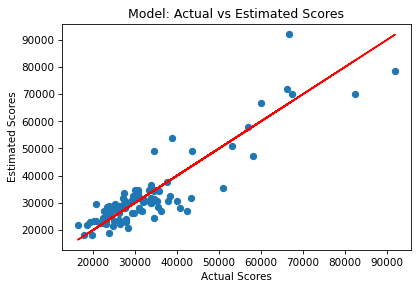

In [64]:
y2_preds = results2.predict(X2_test)
plt.figure(dpi = 75)
plt.scatter(y2_test, y2_preds)
plt.plot(y2_test, y2_test, color="red")
plt.xlabel("Actual Scores")
plt.ylabel("Estimated Scores")
plt.title("Model: Actual vs Estimated Scores")
plt.show()

In [65]:
print("Root Mean Squared Error (RMSE) : {}".format(rmse(y2_test, y2_preds)))

Root Mean Squared Error (RMSE) : 6226.364113716609


add dummies

In [66]:
# create dummies
jobc_dummies = pd.get_dummies(df['JOBCAT'], prefix='jobc', drop_first=True)
gend_dummies = pd.get_dummies(df['GENDER'], prefix='gend', drop_first=True)
mino_dummies = pd.get_dummies(df['MINORITY'], prefix='mino', drop_first=True)
educ_dummies = pd.get_dummies(df['EDUC'], prefix='educ', drop_first=True)
# drop columns
df = df.drop(['JOBCAT','GENDER','MINORITY','EDUC'], axis=1)
# combine datasets
df = pd.concat([df, jobc_dummies, gend_dummies, mino_dummies, educ_dummies], axis=1)
df.head()

,Unnamed: 0,SALARY,SALBEGIN,jobc_2,jobc_3,gend_1,mino_1,educ_12,educ_14,educ_15,educ_16,educ_17,educ_18,educ_19,educ_20,educ_21
0,0,57000,27000,0,1,1,0,0,0,1,0,0,0,0,0,0
1,1,40200,18750,0,0,1,0,0,0,0,1,0,0,0,0,0
2,2,21450,12000,0,0,0,0,1,0,0,0,0,0,0,0,0
3,3,21900,13200,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,45000,21000,0,0,1,0,0,0,1,0,0,0,0,0,0


In [67]:
import itertools

columns=['SALBEGIN', 'jobc_2', 'jobc_3', 'gend_1',
       'mino_1', 'educ_12', 'educ_14', 'educ_15', 'educ_16', 'educ_17',
       'educ_18', 'educ_19', 'educ_20', 'educ_21']

in_list = ['SALBEGIN', 'jobc_2', 'jobc_3', 'gend_1',
       'mino_1', 'educ_12', 'educ_14', 'educ_15', 'educ_16', 'educ_17',
       'educ_18', 'educ_19', 'educ_20', 'educ_21']
out_list = []
for i in range(1, len(in_list)+1):
    out_list.extend(itertools.combinations(in_list, i))

out_list = [x[0] if len(x) == 1 else list(x) for x in out_list]
len(out_list)

16383

In [68]:
out_list[14]

['SALBEGIN', 'jobc_2']

In [69]:
rmse_lst = []
for i in range(len(out_list)):
    X3 = df[out_list[i]]
    X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, random_state=42)
    X3_train = sm.add_constant(X3_train)
    results3 = sm.OLS(y3_train, X3_train).fit()
    X3_test = sm.add_constant(X3_test)
    y3_preds = results3.predict(X3_test)
    rmse_lst.append(rmse(y3_test, y3_preds))
    #print(f"Combination {out_list[i]}: RMSE {rmse(y3_test, y3_preds)}")

In [70]:
min(rmse_lst)

5983.206560880976

In [72]:
rmse_lst.index(min(rmse_lst))

16379

In [73]:
out_list[16379]

['SALBEGIN',
 'jobc_2',
 'gend_1',
 'mino_1',
 'educ_12',
 'educ_14',
 'educ_15',
 'educ_16',
 'educ_17',
 'educ_18',
 'educ_19',
 'educ_20',
 'educ_21']

In [ ]:
salbegin_lst = []
for i in out_list:
    if 'SALBEGIN' in i:
        salbegin_lst.append(1)
    else:
        salbegin_lst.append(0)

drop jobc_3

In [74]:
X4 = df[['SALBEGIN', 'jobc_2', 'gend_1',
       'mino_1', 'educ_12', 'educ_14', 'educ_15', 'educ_16', 'educ_17',
       'educ_18', 'educ_19', 'educ_20', 'educ_21']]

In [75]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y, test_size=0.2, random_state=42)

In [76]:
X4_train = sm.add_constant(X4_train)
results4 = sm.OLS(y4_train, X4_train).fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 SALARY   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     125.9
Date:                Wed, 17 Feb 2021   Prob (F-statistic):          4.36e-126
Time:                        13:15:31   Log-Likelihood:                -3926.0
No. Observations:                 379   AIC:                             7880.
Df Residuals:                     365   BIC:                             7935.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4421.2627   1644.199      2.689      0.007    1187.972    7654.554
SALBEGIN       1.4480      0.087     16.736      0.000       1.278       1.618
jobc_2      2742.6967   2005.265      1.368      0.172   -1200.626    6686.019
gend_1      1841.3654   1036.815      1.776      0.077    -197.515    3880.246
mino_1     -1733.0647   1016.013     -1.706      0.089   -3731.039     264.910
educ_12     1700.1884   1389.561      1.224      0.222   -1032.361    4432.738
educ_14     1814.7159   4153.768      0.437      0.662   -6353.605    9983.037
educ_15     3662.9408   1571.596      2.331      0.020     572.421    6753.460
educ_16     1.101e+04   1879.571      5.859      0.000    7316.241    1.47e+04
educ_17     1.519e+04   3200.471      4.747      0.000    8900.385    2.15e+04
educ_18     1.237e+04   3318.911      3.728      0.000    5847.764    1.89e+04
educ_19     1.571e+04   2710.621      5.794      0.000    1.04e+04     2.1e+04
educ_20     5574.5310   5971.894      0.933      0.351   -6169.106    1.73e+04
educ_21     4437.5572   8142.258      0.545      0.586   -1.16e+04    2.04e+04
==============================================================================
Omnibus:                      171.424   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1455.737
Skew:                           1.697   Prob(JB):                         0.00
Kurtosis:                      11.982   Cond. No.                     3.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

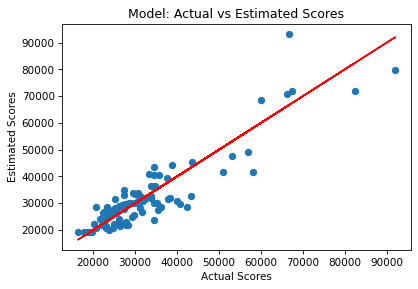

In [79]:
X4_test = sm.add_constant(X4_test)
y4_preds = results4.predict(X4_test)
plt.figure(dpi = 75)
plt.scatter(y4_test, y4_preds)
plt.plot(y4_test, y4_test, color="red")
plt.xlabel("Actual Scores")
plt.ylabel("Estimated Scores")
plt.title("Model: Actual vs Estimated Scores")
plt.show()